# **Introduction**

In this notebook I'm attembting to extract useful information from this dataset as a practice to my python skills, I'm making it public before it's finalized in order get feedback throughout the process so feel free to comment your thoughts :)

**Objective**
The objective of the analysis is to provide insights into Airbnb listings in New York City, focusing on host performance, room pricing and neighborhood trends.

# **Step 1: Importing Libraries**

In [1]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# **Step 2: Loading the Dataset**

In [2]:
df = pd.read_csv('/kaggle/input/new-york-city-airbnb-open-data/AB_NYC_2019.csv')

# **Step 3: Data Exploration**

In [3]:
print("Number of rows =", df.shape[0])
print("\nNumber of features =", df.shape[1])
print("\nData features =",df.columns.tolist())
print("\nMissing values =", df.isnull().sum().values.sum())
print("\nunique values =", df.nunique())

Number of rows = 48895

Number of features = 16

Data features = ['id', 'name', 'host_id', 'host_name', 'neighbourhood_group', 'neighbourhood', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 'number_of_reviews', 'last_review', 'reviews_per_month', 'calculated_host_listings_count', 'availability_365']

Missing values = 20141

unique values = id                                48895
name                              47905
host_id                           37457
host_name                         11452
neighbourhood_group                   5
neighbourhood                       221
latitude                          19048
longitude                         14718
room_type                             3
price                               674
minimum_nights                      109
number_of_reviews                   394
last_review                        1764
reviews_per_month                   937
calculated_host_listings_count       47
availability_365                    366

Okay the number of missing values is a bit concerning so let's take a closer look at that

# **Step 4: Data Cleaning**

In [4]:
df.isnull().any()

id                                False
name                               True
host_id                           False
host_name                          True
neighbourhood_group               False
neighbourhood                     False
latitude                          False
longitude                         False
room_type                         False
price                             False
minimum_nights                    False
number_of_reviews                 False
last_review                        True
reviews_per_month                  True
calculated_host_listings_count    False
availability_365                  False
dtype: bool

So the columns with null values are name, host name, last review and reviews per month, now i want to see how many null values are in each of these columns.

In [5]:
df.isnull().sum()

id                                    0
name                                 16
host_id                               0
host_name                            21
neighbourhood_group                   0
neighbourhood                         0
latitude                              0
longitude                             0
room_type                             0
price                                 0
minimum_nights                        0
number_of_reviews                     0
last_review                       10052
reviews_per_month                 10052
calculated_host_listings_count        0
availability_365                      0
dtype: int64

The reviews columns doesn't show much potential here almost 1/4 of the data there is missing so now we need to decide what to do with it. and in my humble opinion I can fill the null values with 'null' or `interpolate()` but from previous projects I have learned that if the data amount is sufficient and there is no way i can find an appropriate value to fill the missing places with then it's better to just drop them and work with a sample instead.

In [6]:
df_filtered = df.dropna(subset=['last_review','reviews_per_month'])
df_filtered.reset_index(drop=True, inplace=True)

print(f"Original number of rows: {len(df)}")
print(f"Number of rows after dropping nulls: {len(df_filtered)}")

Original number of rows: 48895
Number of rows after dropping nulls: 38843


Now i want to check how the column price looks like, to see if there is any misprepresented data, for example the value 0 shouldn't be considered since 0 is not a real value here.

In [7]:
zero_price_count = (df_filtered['price'] == 0).sum()

print(f"\nNumber of zero values in the 'price' column: {zero_price_count}")


Number of zero values in the 'price' column: 10


There is a small possibility that 0 is an offer value or something but again they are just 10 rows out of 38843 so I believe it's safe to drop

In [8]:
df_filtered = df_filtered[df_filtered['price'] != 0]

print(f"Original number of rows: {len(df)}")
print(f"Number of rows after dropping zero values in price: {len(df_filtered)}")

Original number of rows: 48895
Number of rows after dropping zero values in price: 38833


In [9]:
df_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 38833 entries, 0 to 38842
Data columns (total 16 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38833 non-null  int64  
 1   name                            38827 non-null  object 
 2   host_id                         38833 non-null  int64  
 3   host_name                       38817 non-null  object 
 4   neighbourhood_group             38833 non-null  object 
 5   neighbourhood                   38833 non-null  object 
 6   latitude                        38833 non-null  float64
 7   longitude                       38833 non-null  float64
 8   room_type                       38833 non-null  object 
 9   price                           38833 non-null  int64  
 10  minimum_nights                  38833 non-null  int64  
 11  number_of_reviews               38833 non-null  int64  
 12  last_review                     38833

Ok so what is this info telling us?

We have 38833 entries and our key columns 0 and 2 both are full with no duplicates. Also, our data types are in place except the last_review column so we might need to change this later. 

now let's a look at a few rows.

In [10]:
df_filtered.head(7) #i always use 7 just because

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,2539,Clean & quiet apt home by the park,2787,John,Brooklyn,Kensington,40.64749,-73.97237,Private room,149,1,9,2018-10-19,0.21,6,365
1,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75362,-73.98377,Entire home/apt,225,1,45,2019-05-21,0.38,2,355
2,3831,Cozy Entire Floor of Brownstone,4869,LisaRoxanne,Brooklyn,Clinton Hill,40.68514,-73.95976,Entire home/apt,89,1,270,2019-07-05,4.64,1,194
3,5022,Entire Apt: Spacious Studio/Loft by central park,7192,Laura,Manhattan,East Harlem,40.79851,-73.94399,Entire home/apt,80,10,9,2018-11-19,0.10,1,0
4,5099,Large Cozy 1 BR Apartment In Midtown East,7322,Chris,Manhattan,Murray Hill,40.74767,-73.97500,Entire home/apt,200,3,74,2019-06-22,0.59,1,129
5,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68688,-73.95596,Private room,60,45,49,2017-10-05,0.40,1,0
6,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Hell's Kitchen,40.76489,-73.98493,Private room,79,2,430,2019-06-24,3.47,1,220


Alright then i guess it's time to create a correlation matrix to help lead our analytical thinking.

# **Step 5: Exploratory Data Analysis (EDA)**

In [11]:
numerical = ['id','host_id','price','minimum_nights','number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']

corr = df_filtered[numerical].corr()

fig = px.imshow(corr,text_auto=True, width=1000, height=1000)
fig.show()

Studying the graph above we can see that the highest positive relationship is between the number of reviews and the reviews per month which surprise surprise! makes sense. I honestly thought it should be higher than that.

So i think it's safe to say now that there is no significant correlation whatsoever among this data so let's move on.


In [12]:
summary_stats_col = ['price', 'minimum_nights', 'number_of_reviews','reviews_per_month','calculated_host_listings_count','availability_365']
summary_stats = df_filtered[summary_stats_col].describe()

summary_stats

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,38833.000000,38833.000000,38833.000000,38833.000000,38833.000000,38833.000000
mean,142.354595,5.867561,29.295393,1.373128,5.164602,114.878222
std,196.957737,17.386070,48.188127,1.680391,26.299034,129.549091
min,10.000000,1.000000,1.000000,0.010000,1.000000,0.000000
25%,69.000000,1.000000,3.000000,0.190000,1.000000,0.000000
50%,101.000000,2.000000,9.000000,0.720000,1.000000,55.000000
75%,170.000000,4.000000,33.000000,2.020000,2.000000,229.000000
max,10000.000000,1250.000000,629.000000,58.500000,327.000000,365.000000


What is this table telling us?

starting with the standard deviation we can see that price and availability have very high variation among their numbers which means that some hosts have very high prices and some have very low and the same goes for availability, so this i think is worth investigating to see if hosts with high prices have small rate of occupancy or not.

the reviews per month std. shows that most listings are in the same range. while other variations have moderate variations.

so the next think i want to do is to check for skewness and draft a graph to see if we have any outliers so let's start with skewness and narrow it down from there.

In [13]:
from scipy.stats import skew

skewness = df_filtered[summary_stats_col].skew()
print(skewness)

price                             23.679370
minimum_nights                    27.547935
number_of_reviews                  3.324187
reviews_per_month                  3.131063
calculated_host_listings_count    10.629901
availability_365                   0.723382
dtype: float64


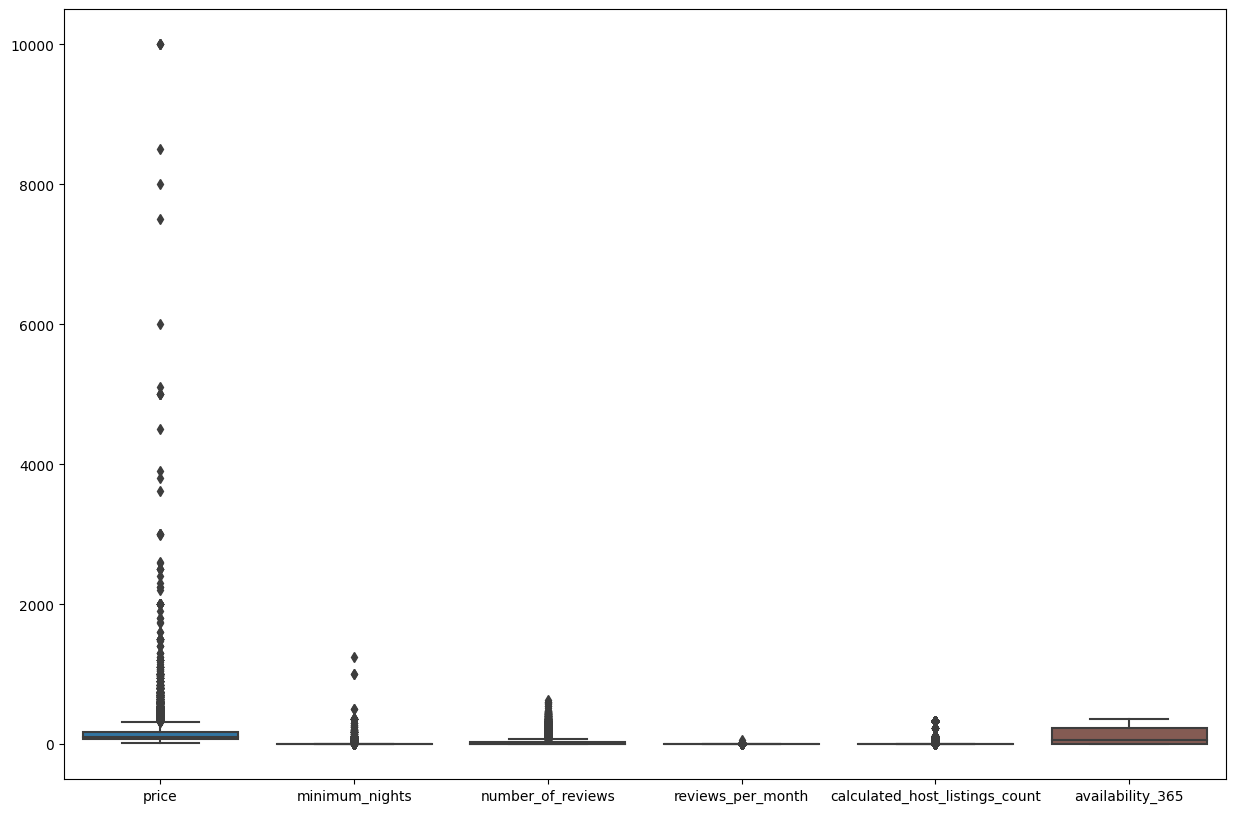

In [14]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_filtered[summary_stats_col])
plt.show()

What we can see above is that price has the largest outliers, followed by minimum nights as their skeweness score indicated while availability seems to have none. 

But I have noticed now that minimum nights have values reaching over thousand nights which is highly unusual. According to the latest update, AirBnB allows a maximum of 365 nights. So i'm thinking of Capping the values on 365.

In [15]:
df_filtered['minimum_nights_capped'] = df_filtered['minimum_nights'].clip(upper=365)

print(df_filtered['minimum_nights_capped'])

0         1
1         1
2         1
3        10
4         3
         ..
38838     1
38839     1
38840     1
38841     1
38842     1
Name: minimum_nights_capped, Length: 38833, dtype: int64


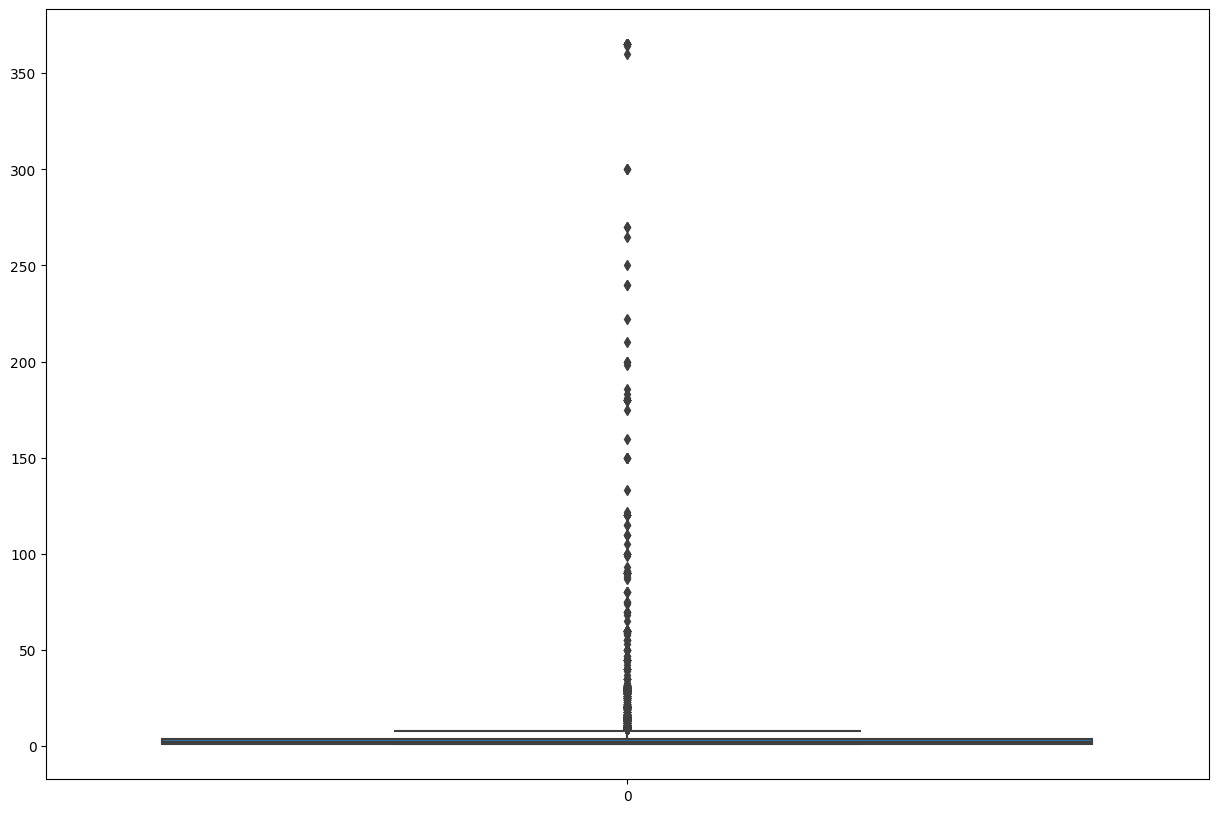

In [16]:
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_filtered['minimum_nights_capped'])
plt.show()

So now that the column looks a bit closer to normal we can head to the most fun part.

# **Step 6: Insights & Analysis**

So The questions that I want to investigate after exploring the data are:

**1- which areas have the highest average price and their reviews?**

In [17]:
#first I'm going to aggregate the neighborhoods into their groups and find the average price and the total number of reviews for each.
neighborhood_stats = df_filtered.groupby(['neighbourhood_group', 'neighbourhood'], as_index=False).agg({
    'price': 'mean',
    'number_of_reviews': 'sum'
}).reset_index()

#and since there are too many neighborhoods it's enough to just see the top five from each group.
top_neighborhoods = neighborhood_stats.groupby('neighbourhood_group',group_keys=False).apply(lambda x: x.nlargest(5, 'price')).reset_index(drop=True)

/tmp/ipykernel_18/1358184676.py:8: DeprecationWarning:

DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.



In [18]:
top_neighborhoods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 5 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   index                25 non-null     int64  
 1   neighbourhood_group  25 non-null     object 
 2   neighbourhood        25 non-null     object 
 3   price                25 non-null     float64
 4   number_of_reviews    25 non-null     int64  
dtypes: float64(1), int64(2), object(2)
memory usage: 1.1+ KB


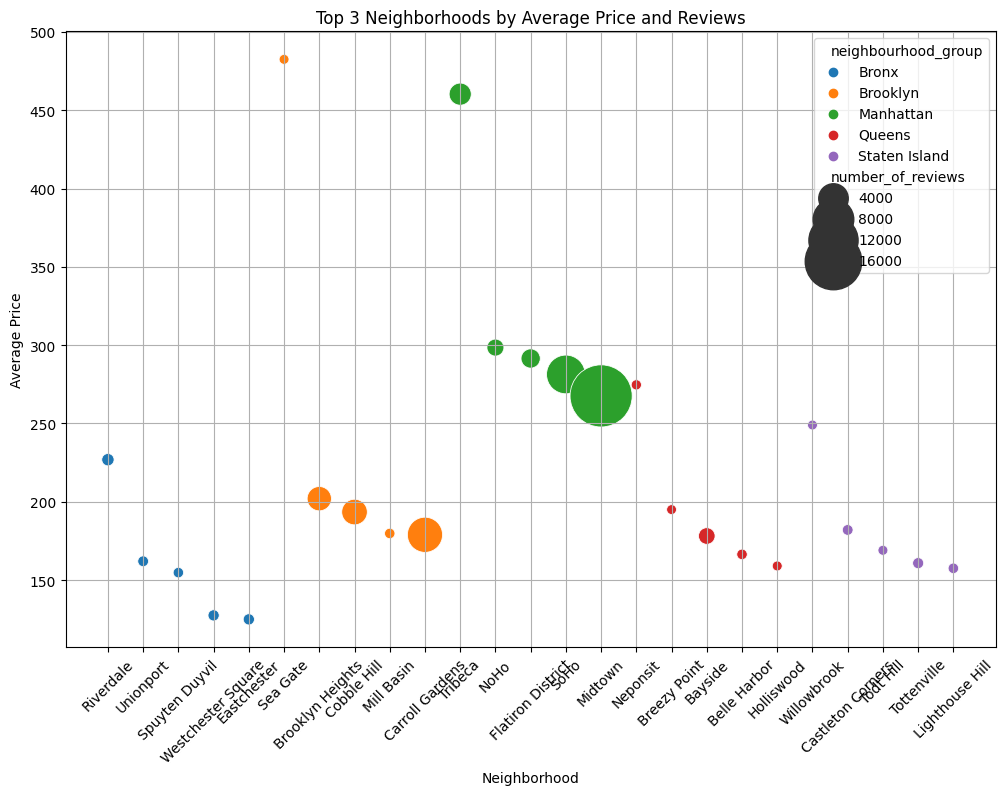

In [19]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=top_neighborhoods, x='neighbourhood', y='price', hue='neighbourhood_group', size='number_of_reviews', sizes=(50, 2000), legend='auto')
plt.title('Top 3 Neighborhoods by Average Price and Reviews')
plt.xlabel('Neighborhood')
plt.ylabel('Average Price')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

I want to see it as a table to make a bit clearer

In [20]:
from tabulate import tabulate

top_neighborhoods_sorted = top_neighborhoods.sort_values(by='price', ascending=False)

print(tabulate(top_neighborhoods_sorted, headers='keys', tablefmt='psql'))

+----+---------+-----------------------+--------------------+---------+---------------------+
|    |   index | neighbourhood_group   | neighbourhood      |   price |   number_of_reviews |
|----+---------+-----------------------+--------------------+---------+---------------------|
|  5 |      88 | Brooklyn              | Sea Gate           | 482.5   |                  10 |
| 10 |     121 | Manhattan             | Tribeca            | 460.3   |                2034 |
| 11 |     115 | Manhattan             | NoHo               | 298.452 |                 994 |
| 12 |     102 | Manhattan             | Flatiron District  | 291.483 |                1419 |
| 13 |     118 | Manhattan             | SoHo               | 281.303 |                7235 |
| 15 |     163 | Queens                | Neponsit           | 274.667 |                  46 |
| 14 |     112 | Manhattan             | Midtown            | 267.583 |               19444 |
| 20 |     217 | Staten Island         | Willowbrook        

So from the table and the graph above, we can tell that Manhattan have the highest prices and their number of reviews fall in the maximum range. but from the variation of the number of reviews column we can say that the listings with the highest prices tend to receive reviews predominantly on the higher end of the spectrum but it's clear to see that price does not influence the number of reviews.

**2- Are there any patterns or common traits among the most successful hosts (e.g., higher reviews per month, higher availability)?**

2- Are there any patterns or common traits among the most successful hosts (e.g., higher reviews per month, higher availability)?
Here it's somehow the same approach as the first question, but instead of looking into neighborhoods we'll look into hosts performance investigating their listings performance.

I think the columns we'll need in order to measure a hosts performance are:

**availability_365** we can use it calculate occupancy rate, a small occupancy should indicate that the hosts listings are mostly booked throughout the year.

**price** how much do they cahrge for their listings on average.

**number_of_reviews** their total number of reviews for all listings.

**calculated_host_listings_count** the total number of listings

so we can assign weights for those three metrics to give us a score that indicates how a host is performing to some extend.

In [21]:
df_filtered['occupancy_rate'] = 1 - (df_filtered['availability_365']/365)

host_performance = df_filtered.groupby(['host_name'], as_index = False).agg({
    'occupancy_rate': 'mean',
    'price':'mean',
    'number_of_reviews':'sum',
    'calculated_host_listings_count':'sum'
}).reset_index()

host_performance['Performance_score'] = host_performance['occupancy_rate']*0.3 + host_performance['price']*0.2 + host_performance['number_of_reviews']*0.2 +host_performance['calculated_host_listings_count']*0.3

host_performance.head(7)

,index,host_name,occupancy_rate,price,number_of_reviews,calculated_host_listings_count,Performance_score
0,0,'Cil,0.183562,120.0,240,1,72.355068
1,1,(Ari) HENRY LEE,0.846575,140.0,3,1,29.153973
2,2,(Email hidden by Airbnb),0.803836,188.0,75,7,54.941151
3,3,(Mary) Haiy,0.191781,126.0,188,1,63.157534
4,4,-TheQueensCornerLot,0.320548,150.0,51,1,40.596164
5,5,2018Serenity,0.912329,50.0,4,1,11.373699
6,6,371,0.613699,225.0,8,1,47.084110


Cool, now let's visualize it.

In [22]:
Top_hosts = host_performance.nlargest(25, 'Performance_score')

table_columns = Top_hosts[['host_name','occupancy_rate','price','number_of_reviews','calculated_host_listings_count']]

pd.set_option('display.max_colwidth', None)

print(tabulate(table_columns, headers='keys', tablefmt='psql',showindex=False))

+-------------------+------------------+-----------+---------------------+----------------------------------+
| host_name         |   occupancy_rate |     price |   number_of_reviews |   calculated_host_listings_count |
|-------------------+------------------+-----------+---------------------+----------------------------------|
| Sonder (NYC)      |        0.209966  |  270.145  |                1281 |                            67689 |
| Michael           |        0.733371  |  153.173  |               11081 |                              939 |
| John              |        0.595233  |  136.232  |                7223 |                             2694 |
| Corporate Housing |        0.338616  |  144.62   |                 417 |                             7189 |
| Blueground        |        0.25636   |  285.393  |                  29 |                             6496 |
| Olson             |        1         | 9999      |                   1 |                                1 |
| David   

The table above shows the top 25 hosts based on their performance score, it shows that the most successful hosts often manage multiple listings and tend to receive a high number of reviews. Their prices are generally in the middle range, but their occupancy rates vary widely.


**3- What is the relationship between price and room type? Which room types command the highest prices?**

This can be shown using a simple bar graph.

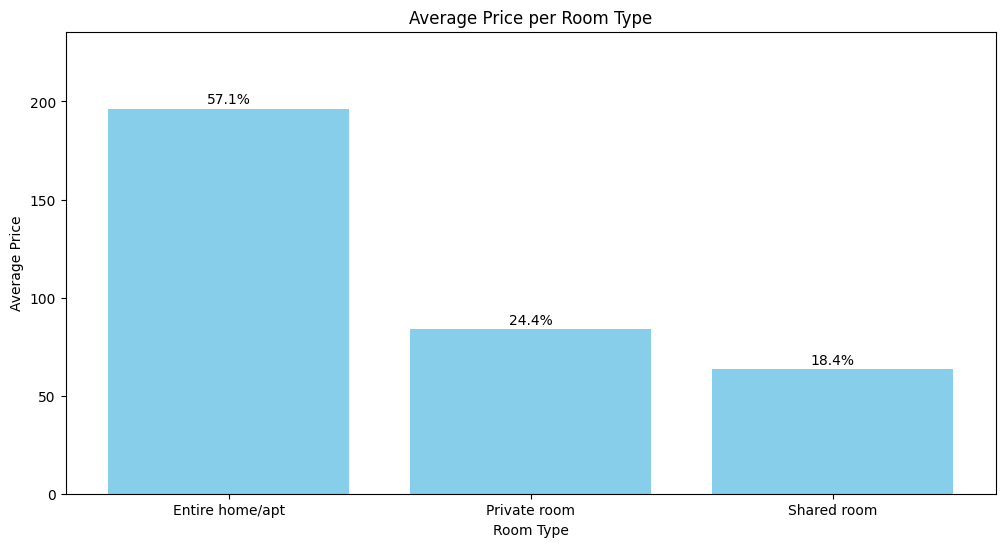

In [23]:
avg_price_per_room = df_filtered.groupby('room_type')['price'].mean().reset_index()

total_avg_price = avg_price_per_room['price'].sum()
avg_price_per_room['percentage'] = (avg_price_per_room['price']/total_avg_price)*100


plt.figure(figsize=(12, 6))
bars = plt.bar(avg_price_per_room['room_type'], avg_price_per_room['price'], color='skyblue')

for bar, percentage in zip(bars, avg_price_per_room['percentage']):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1, f'{percentage:.1f}%', ha='center', va='bottom')

plt.title('Average Price per Room Type')
plt.xlabel('Room Type')
plt.ylabel('Average Price')
plt.ylim(0, max(avg_price_per_room['price']) * 1.2)
plt.show()

It's clear that entire home/apartment have the highest average of prices by 57.1%

**4- Which neighborhoods are the most popular based on the number of listings and reviews?**

In [24]:
import folium

neighborhood_stats = df_filtered.groupby('neighbourhood_group').agg({
    'latitude': 'mean',
    'longitude': 'mean',
    'calculated_host_listings_count': 'sum',
    'number_of_reviews': 'sum'
}).reset_index()

Neighborhood_sorted = neighborhood_stats.sort_values('number_of_reviews', ascending=False)
Neigh_table = Neighborhood_sorted[['neighbourhood_group','calculated_host_listings_count','number_of_reviews']]

# Print neighborhood_stats for debugging
print("Aggregated Neighborhood Stats:")
print(Neigh_table)

# Create a Folium map centered around New York City
map_center = (40.7128, -74.0060)  # Coordinates for New York City
map_nyc = folium.Map(location=map_center, zoom_start=11, tiles='OpenStreetMap', attr='Map data © OpenStreetMap contributors',width='100%', height='600px')

neighborhood_colors = {
    'Manhattan': 'blue',
    'Brooklyn': 'green',
    'Queens': 'red',
    'Bronx': 'orange',
    'Staten Island': 'purple'
}

for index, row in neighborhood_stats.iterrows():
    neighborhood_group = row['neighbourhood_group']
    color = neighborhood_colors.get(neighborhood_group, 'gray')  # Default to gray if not found
    size = row['number_of_reviews'] * 0.0001  # Adjust size as needed

    popup_text = f"Neighborhood Group: {neighborhood_group}<br>" \
                 f"Number of Listings: {row['calculated_host_listings_count']}<br>" \
                 f"Total Reviews: {row['number_of_reviews']}"

    folium.CircleMarker(
        location=[row['latitude'], row['longitude']],
        radius=size,
        popup=popup_text,
        color=color,
        fill=True,
        fill_color=color,
        fill_opacity=0.7,
    ).add_to(map_nyc)

# Display the map inline in the notebook
map_nyc

Aggregated Neighborhood Stats:
  neighbourhood_group  calculated_host_listings_count  number_of_reviews
1            Brooklyn                           36685             486252
2           Manhattan                          145852             454569
3              Queens                           15343             156950
0               Bronx                            1927              28316
4       Staten Island                             750              11541


So it's obvious that Brooklyn and Manhattan have the highest reviews and number of listings.

**5- Are there emerging neighborhoods that show potential for growth in Airbnb listings and tourism?**

In [25]:
df_filtered.info()
print(df_filtered['last_review'])

<class 'pandas.core.frame.DataFrame'>
Index: 38833 entries, 0 to 38842
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              38833 non-null  int64  
 1   name                            38827 non-null  object 
 2   host_id                         38833 non-null  int64  
 3   host_name                       38817 non-null  object 
 4   neighbourhood_group             38833 non-null  object 
 5   neighbourhood                   38833 non-null  object 
 6   latitude                        38833 non-null  float64
 7   longitude                       38833 non-null  float64
 8   room_type                       38833 non-null  object 
 9   price                           38833 non-null  int64  
 10  minimum_nights                  38833 non-null  int64  
 11  number_of_reviews               38833 non-null  int64  
 12  last_review                     38833

here is where I'll need to convert my last_review column to datetime instead of object. I will extract the Year and Month as well.

In [26]:
df_filtered['last_review'] = pd.to_datetime(df_filtered['last_review'], errors='coerce')

df_filtered['year'] = df_filtered['last_review'].dt.year
df_filtered['month'] = df_filtered['last_review'].dt.month

Next I'm going to group the data per neighborhood group to see their performance accross year,months in a line chart.

In [27]:
monthly_performance = df_filtered.groupby(['neighbourhood_group','year','month']).agg({
    'reviews_per_month':'sum',
    'price':'mean',
    'calculated_host_listings_count':'sum',
    'occupancy_rate':'mean'
}).reset_index()

monthly_performance = monthly_performance.sort_values(by=['year', 'month'])
monthly_performance['year_month'] = monthly_performance['year'].astype(str) + '-' + monthly_performance['month'].astype(str).str.zfill(2)
monthly_performance.info()

<class 'pandas.core.frame.DataFrame'>
Index: 308 entries, 47 to 307
Data columns (total 8 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   neighbourhood_group             308 non-null    object 
 1   year                            308 non-null    int32  
 2   month                           308 non-null    int32  
 3   reviews_per_month               308 non-null    float64
 4   price                           308 non-null    float64
 5   calculated_host_listings_count  308 non-null    int64  
 6   occupancy_rate                  308 non-null    float64
 7   year_month                      308 non-null    object 
dtypes: float64(3), int32(2), int64(1), object(2)
memory usage: 19.2+ KB


In [28]:
last_three_years = monthly_performance['year'].unique()[-3:]
monthly_performance_last_three_years = monthly_performance[monthly_performance['year'].isin(last_three_years)]


figure_reviews = px.line(
    monthly_performance_last_three_years, 
    x='year_month', 
    y='reviews_per_month', 
    color='neighbourhood_group', 
    line_group='neighbourhood_group',
    hover_name='neighbourhood_group', 
    title='Monthly Number of Reviews by Neighborhood Group (Last Three Years)',
    labels={
        'year_month': 'Year-Month',
        'reviews_per_month': 'Number of Reviews',
        'neighbourhood_group': 'Neighbourhood Group'
    }
)

figure_occupancy = px.line(
    monthly_performance_last_three_years, 
    x='year_month', 
    y='occupancy_rate', 
    color='neighbourhood_group', 
    line_group='neighbourhood_group',
    hover_name='neighbourhood_group', 
    title='Monthly Occupancy Rate by Neighborhood Group (Last Three Years)',
    labels={
        'year_month': 'Year-Month',
        'occupancy_rate': 'Occupancy Rate',
        'neighbourhood_group': 'Neighbourhood Group'
    }
)

figure_listings = px.line(
    monthly_performance_last_three_years, 
    x='year_month', 
    y='calculated_host_listings_count', 
    color='neighbourhood_group', 
    line_group='neighbourhood_group',
    hover_name='neighbourhood_group', 
    title='Monthly Number of Listings by Neighborhood Group (Last Three Years)',
    labels={
        'year_month': 'Year-Month',
        'calculated_host_listings_count': 'Number of Listings',
        'neighbourhood_group': 'Neighbourhood Group'
    }
)

# Show the figures
figure_reviews.show()
figure_occupancy.show()
figure_listings.show()

So based on the graphs above:

**Monthly number of reviews** it was a steady ride up until Apr 2019, Brooklyn and Manhattan had a huge rise and out performed the other groups.

**Monthly Occupancy rate** here it was a rollercoaster for all groups but towards the end of 2019 Mnhattan and Brooklyn were taking the lead.

**Monthly number of Listing** the same with the number of reviews, there is no notable change until Apr 2019 when Brooklyn and Manhattan started taking the lead again but this time Manhattan had way more listings than Brooklyn.

It is safe to say that Manhattan and Brooklyn are showing significant potential for growth. The numbers indicate that they are attracting more tourists than other neighborhoods and also more property owners listing their spaces. Therefore, there is substantial investment potential in these two neighborhood groups.

# **Step 7: Conclusion**

Upon Analysing the Airbnb Listings in NewYork city, I arrived to the following conclusions:

* **Data Integrity:** A significant portion of the data, particularly in the reviews columns, is missing. Addressing this by either interpolating or dropping these entries is crucial for maintaining the accuracy of the analysis.
* **Price Anomalies:** The presence of zero values in the price column and unusually high values in the minimum nights column suggests data cleaning is necessary. Capping values at 365 nights ensures more realistic insights.
* **Neighborhood Trends:** Manhattan and Brooklyn stand out as the neighborhoods with the highest average prices and the greatest number of reviews. They show a consistent trend of growth in terms of tourist attraction and property listings.
* **Host Performance:** Successful hosts often manage multiple listings, receive a high number of reviews, and have mid-range prices. High occupancy rates indicate that these hosts maintain a well-balanced approach to pricing and availability.
* **Room Types:** Entire homes/apartments command the highest prices, highlighting the preference for private accommodations among tourists.

# Further Investigation

In order to get more insights, the following areas should be investigated:
* Missing Data: Conduct a deeper analysis to understand the reasons behind missing values.
* Impact of Events: Analyze the impact of major events or holidays on Airbnb listings' performance to identify patterns and opportunities for hosts.
* Competitive Analysis: Compare the performance of Airbnb listings with other accommodation options in the same neighborhoods to identify competitive advantages and areas for improvement.